# Movie Recommender System

***
## About the Project

Using ratings provided by users on movies they have watched, possible movie recommender systems have been developed using various concepts. A simple recommender has been developed to recommend the most popular movies based on general consensus. To improve the simple recommender, the genre of the top rated movies by any given user was also considered for the Genre-Based Popularity Recommender. Lastly, collaborative filtering was used to develop a deep learning model to make recommendations for any given user. 

***
## Table of Content
### 1. Setup
### 2. Importing Data
### 3. Popularity Recommender
### 4. Genre-Based Popularity Recommender
### 5. Collaborative Filtering Recommmender
***

## 1. Setup

In [71]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dot, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

## 2. Importing Data

There are 2 datasets that will be used to develop a movie recommender system. 
1. movies.csv
2. ratings.csv

Let's import them to explore the data.

In [72]:
movie = pd.read_csv("movies.csv")
movie.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [73]:
movie.shape

(9742, 3)

In [74]:
movie.isna().values.any()

False

As seen from above, there are 9742 movies in the given movies dataset and their respective genres have been indicated. In addition, there are no missing values in the movies dataset. We will now explore the ratings dataset. 

In [75]:
rating = pd.read_csv("ratings.csv")
rating.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [76]:
rating.shape

(100836, 4)

In [77]:
rating['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
406      20
595      20
569      20
431      20
442      20
Name: userId, Length: 610, dtype: int64

In [78]:
rating['movieId'].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: movieId, Length: 9724, dtype: int64

In [79]:
rating.isna().values.any()

False

As seen from above, there are 100836 ratings contributed by 610 unique users for 9724 movies. Similar to the movies dataset, there are no missing values in the ratings dataset. 

## 3. Popularity Recommender

A simple recommender is developed to simply recommend the top 10 popular movies. 

In [80]:
popular = rating.groupby(['movieId'])['rating'].agg([sum])
popular

,sum
movieId,
1,843.0
2,377.5
3,169.5
4,16.5
5,150.5
...,...
193581,4.0
193583,3.5
193585,3.5


In [81]:
popular['count'] = rating.groupby(['movieId'])['movieId'].count()

In [82]:
popular['avgscore'] = popular['sum']/popular['count']
popular

,sum,count,avgscore
movieId,,,
1,843.0,215,3.920930
2,377.5,110,3.431818
3,169.5,52,3.259615
4,16.5,7,2.357143
5,150.5,49,3.071429
...,...,...,...
193581,4.0,1,4.000000
193583,3.5,1,3.500000
193585,3.5,1,3.500000


Looking at the table above, it can be seen that there are movies which are highly rated but with low number of ratings. To take into account the number of ratings, ie popularity factor, a simple weighted average of the movie score would be computed below.

In [83]:
totalcount = popular['count'].sum()
popular['popularity'] = (popular['count']/totalcount)*popular['avgscore']
popular = popular.reset_index()
popular

,movieId,sum,count,avgscore,popularity
0,1,843.0,215,3.920930,0.008360
1,2,377.5,110,3.431818,0.003744
2,3,169.5,52,3.259615,0.001681
3,4,16.5,7,2.357143,0.000164
4,5,150.5,49,3.071429,0.001493
...,...,...,...,...,...
9719,193581,4.0,1,4.000000,0.000040
9720,193583,3.5,1,3.500000,0.000035
9721,193585,3.5,1,3.500000,0.000035
9722,193587,3.5,1,3.500000,0.000035


In [84]:
popular = pd.merge(popular,movie, on="movieId", how="inner")
popular

,movieId,sum,count,avgscore,popularity,title,genres
0,1,843.0,215,3.920930,0.008360,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,377.5,110,3.431818,0.003744,Jumanji (1995),Adventure|Children|Fantasy
2,3,169.5,52,3.259615,0.001681,Grumpier Old Men (1995),Comedy|Romance
3,4,16.5,7,2.357143,0.000164,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,150.5,49,3.071429,0.001493,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...,...
9719,193581,4.0,1,4.000000,0.000040,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9720,193583,3.5,1,3.500000,0.000035,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9721,193585,3.5,1,3.500000,0.000035,Flint (2017),Drama
9722,193587,3.5,1,3.500000,0.000035,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Information about the respective movies are added to complete the picture. 

In [85]:
popular.sort_values(by="popularity", ascending=False)['title'][:10]

277              Shawshank Redemption, The (1994)
314                           Forrest Gump (1994)
257                           Pulp Fiction (1994)
1938                           Matrix, The (1999)
510              Silence of the Lambs, The (1991)
224     Star Wars: Episode IV - A New Hope (1977)
97                              Braveheart (1995)
2224                            Fight Club (1999)
461                       Schindler's List (1993)
418                          Jurassic Park (1993)
Name: title, dtype: object

As seen above, this simple popularity recommender has recommended the top 10 most popular movies of all time.

## 4. Genre-Based Popularity Recommender
To further refine the popularity recommender, we could try to take into consideration the preference of genre for a given user. For example, if a user likes comedy movies, a genre-based recommender would propose the top 10 most popular comedy movies of all time as shown above. 

In [86]:
popular[popular['genres'].str.contains("Comedy")].sort_values(by="popularity", ascending=False)['title'][:10]

314                  Forrest Gump (1994)
257                  Pulp Fiction (1994)
0                       Toy Story (1995)
520                         Fargo (1996)
506                       Aladdin (1992)
968            Back to the Future (1985)
3189                        Shrek (2001)
337                     True Lies (1994)
898           Princess Bride, The (1987)
1182    Men in Black (a.k.a. MIB) (1997)
Name: title, dtype: object

The Genre-Based Popularity Recommender function is further developed below by determining the preferred genre of a given user based on movies rated by the user and to recommend the top 10 most popular movies from the same genre which the user has not watched. 

In [121]:
def genreRec(user, rating, popular):
    #find movieId which given user has watched
    watched_id = rating[rating["userId"]==testuser]['movieId'].unique()
    
    #find movies which given user has watched
    watched_movies = rating[rating["userId"]==testuser].sort_values(by="rating", ascending=False)[:10]["movieId"].values
    watched = movie[movie["movieId"].isin(watched_movies)]
    print(f"Examples of movies rated by user {user}:")
    for row in watched.itertuples():
        print(row.title, ":", row.genres) 
    
    #split genres of movies which given user has watched and determine the most frequent genre
    topGenre = pd.Series(' '.join(watched['genres']).split("|")).value_counts()[:1]  
    print(f"\nTop genre of user {user} is {topGenre.index[0]}\n")
    
    #find movieId which given user has not watched
    notwatched_id = rating[rating["userId"]!=testuser]['movieId'].unique()
    
    #find movies which given user has not watched
    notwatched = popular[popular["movieId"].isin(notwatched_id)]
    
    #among the movies which given user has not watched, filter movies from user's preferred genre and return the top 10 most popular ones
    print(f"Movies generated by Genre-Based Popularity Recommender for user {user}:")
    rec_movies = popular[popular['genres'].str.contains(topGenre.index[0])].sort_values(by="popularity", ascending=False)[:10]
    for row in rec_movies.itertuples():
        print(row.title, ":", row.genres) 

In [122]:
#randomly pick a user to generate recommendation
testuser = rating["userId"].sample(1).iloc[0]
genreRec(testuser, rating, popular)

Examples of movies rated by user 41:
Shining, The (1980) : Horror
Stand by Me (1986) : Adventure|Drama
Titanic (1997) : Drama|Romance
Rosemary's Baby (1968) : Drama|Horror|Thriller
Eyes Wide Shut (1999) : Drama|Mystery|Thriller
Cast Away (2000) : Drama
Along Came Polly (2004) : Comedy|Romance
50 First Dates (2004) : Comedy|Romance
Horrible Bosses (2011) : Comedy|Crime
Prisoners (2013) : Drama|Mystery|Thriller

Top genre of user 41 is Mystery

Movies generated by Genre-Based Popularity Recommender for user 41:
Usual Suspects, The (1995) : Crime|Mystery|Thriller
Seven (a.k.a. Se7en) (1995) : Mystery|Thriller
Twelve Monkeys (a.k.a. 12 Monkeys) (1995) : Mystery|Sci-Fi|Thriller
Sixth Sense, The (1999) : Drama|Horror|Mystery
Memento (2000) : Mystery|Thriller
Inception (2010) : Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
Mission: Impossible (1996) : Action|Adventure|Mystery|Thriller
Reservoir Dogs (1992) : Crime|Mystery|Thriller
Minority Report (2002) : Action|Crime|Mystery|Sci-Fi|Thrille

## 5. Collaborative Filtering Recommender

To further improve the performance of the movie recommender, we could develop an algorithm which uses collaborative filtering. This is based on the concept that other users who give similar ratings to movies as a given user would most probably have similar preferences. 

In [107]:
#obtain list of userId and movieId
useridlist = list(rating['userId'].unique())
movieidlist = list(rating['movieId'].unique())

#perform integer encoding on userId and movieId
enc_user = {user: encodeidx for encodeidx, user in enumerate(useridlist)}
enc_movie = {movie: encodeidx for encodeidx, movie in enumerate(movieidlist)}

#map userId and movieId in rating dataframe to the respective encoded integer
rating['enc_user'] = rating['userId'].map(enc_user)
rating['enc_movie'] = rating['movieId'].map(enc_movie)

#perform normalization of rating
minrating = rating['rating'].min()
maxrating = rating['rating'].max()
rating['rating_norm']=(rating['rating']-minrating)/(maxrating-minrating)

rating

,userId,movieId,rating,timestamp,enc_user,enc_movie,rating_norm
0,1,1,4.0,964982703,0,0,0.777778
1,1,3,4.0,964981247,0,1,0.777778
2,1,6,4.0,964982224,0,2,0.777778
3,1,47,5.0,964983815,0,3,1.000000
4,1,50,5.0,964982931,0,4,1.000000
...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,609,3120,0.777778
100832,610,168248,5.0,1493850091,609,2035,1.000000
100833,610,168250,5.0,1494273047,609,3121,1.000000
100834,610,168252,5.0,1493846352,609,1392,1.000000


In [108]:
x = rating[["enc_user","enc_movie"]].values
y = rating["rating_norm"].values

#use 70% of data to train model and reserve remaining 30% for validation of model
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=88)

#as there will be 2 inputs to the deep learning model used to predict ratings, we will split x_train and x_test into 2 sub-arrays
x_train_array = [x_train[:, 0], x_train[:, 1]]
x_test_array = [x_test[:, 0], x_test[:, 1]]

In [109]:
#A deep learning model is developed using the users and movies that they have rated as inputs and the rating as output. 

def CFRecModel(num_users, num_movies, num_factors=50):
    user = Input(shape=(1,))
    u = Embedding(num_users, num_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(user)
    u = Reshape((num_factors,))(u)

    movie = Input(shape=(1,))
    m = Embedding(num_movies, num_factors, embeddings_initializer='he_normal',
                      embeddings_regularizer=l2(1e-6))(movie)
    m = Reshape((num_factors,))(m)

    result = Dot(axes=1)([u,m])

    model = Model(inputs=[user,movie], outputs=result)
    opt = Adam(lr=0.001)
    model.compile(loss="mean_squared_error", optimizer=opt)
    
    return model

In [110]:
num_users = len(useridlist)
num_movies = len(movieidlist)

model = CFRecModel(num_users, num_movies)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 50)        30500       input_3[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 50)        486200      input_4[0][0]                    
____________________________________________________________________________________________

In [111]:
history = model.fit(x=x_train_array, y=y_train, batch_size=64, epochs=5, verbose=1, validation_data=(x_test_array, y_test))


Epoch 1/5
1103/1103 [==============================] - 12s 10ms/step - loss: 0.4478 - val_loss: 0.1007
Epoch 2/5
1103/1103 [==============================] - 10s 9ms/step - loss: 0.0694 - val_loss: 0.0663
Epoch 3/5
1103/1103 [==============================] - 10s 9ms/step - loss: 0.0380 - val_loss: 0.0636
Epoch 4/5
1103/1103 [==============================] - 10s 9ms/step - loss: 0.0279 - val_loss: 0.0640
Epoch 5/5
1103/1103 [==============================] - 10s 9ms/step - loss: 0.0212 - val_loss: 0.0653


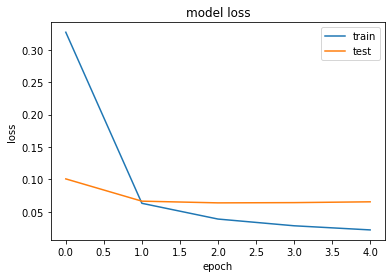

In [112]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()

After developing the model above, let's test it out with a random user. A function is created below to generate recommendations with the model created above for a given user. 

In [113]:
def CFRec(testuser, enc_user, rating, enc_movie):

    #find movies which have been watched by given user
    watched = rating[rating["userId"]==testuser]
    
    #print top 10 movies rated by user
    top_watched_id = watched.sort_values(by="rating", ascending=False)[:10]
    top_watched = movie[movie["movieId"].isin(top_watched_id["movieId"])]
    print(f"Top 10 Movies rated by user {testuser}:")
    for row in top_watched.itertuples():
        print(row.title, ":", row.genres)    
    
    #obtain encoded integer for given userId
    testuser_enc = enc_user.get(testuser)
    #find movies which have not been watched by given user
    notwatched = rating[rating["userId"]!=testuser]["movieId"].unique()

    #obtain encoded integer for movies which given user has not watched
    notwatched_enc = [[enc_movie.get(x)] for x in notwatched]

    #create input for model
    user_movie_array = np.hstack(([[testuser_enc]] * len(notwatched), notwatched_enc))
    
    #use developed model to predict ratings for given user 
    user_ratings = model.predict([user_movie_array[:,0], user_movie_array[:,1]]).flatten()

    #find top 10 movies based on predicted ratings for given user
    top_rating = user_ratings.argsort()[::-1]
    topmovieids = [enc_movie.get(notwatched_enc[x][0]) for x in top_rating]
    recommended_movies = movie[movie["movieId"].isin(topmovieids)][:10]
    print(f"\nTop 10 movies recommended to user {testuser}:")
    for row in recommended_movies.itertuples():
        print(row.title, ":", row.genres) 

In [123]:
#randomly pick a user to generate recommendation
CFRec(testuser, enc_user, rating, enc_movie)

Top 10 Movies rated by user 41:
Shining, The (1980) : Horror
Stand by Me (1986) : Adventure|Drama
Titanic (1997) : Drama|Romance
Rosemary's Baby (1968) : Drama|Horror|Thriller
Eyes Wide Shut (1999) : Drama|Mystery|Thriller
Cast Away (2000) : Drama
Along Came Polly (2004) : Comedy|Romance
50 First Dates (2004) : Comedy|Romance
Horrible Bosses (2011) : Comedy|Crime
Prisoners (2013) : Drama|Mystery|Thriller

Top 10 movies recommended to user 41:
Toy Story (1995) : Adventure|Animation|Children|Comedy|Fantasy
Jumanji (1995) : Adventure|Children|Fantasy
Grumpier Old Men (1995) : Comedy|Romance
Waiting to Exhale (1995) : Comedy|Drama|Romance
Father of the Bride Part II (1995) : Comedy
Heat (1995) : Action|Crime|Thriller
Sabrina (1995) : Comedy|Romance
Tom and Huck (1995) : Adventure|Children
Sudden Death (1995) : Action
GoldenEye (1995) : Action|Adventure|Thriller
